<a href="https://colab.research.google.com/github/sakshighugare/OIBSIP/blob/main/Final_Email_spam_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam detection with Machine Learning**


# Problem Statement

Develop a machine learning model that accurately identifies and classifies emails as either spam or non-spam (ham). The model should analyze the content and characteristics of emails to distinguish between legitimate and unwanted messages. By effectively detecting spam, the goal is to reduce the risk of users being exposed to malicious or unsolicited content, enhance email filtering systems, and improve overall email security and user experience.

# Objective

The objective of an email spam prediction machine learning project is to develop a model that can accurately detect and classify incoming emails as either spam or legitimate (ham). The primary goals include reducing false positives and false negatives, enhancing user experience by providing a clean inbox, improving security by detecting harmful content, ensuring real-time classification, and generalizing well to new spamming techniques. A successful project aims to deliver a reliable and adaptable spam detection system for users' benefit.

# importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Data Collection & Pre-Processing


In [ ]:
#importing Data
df = pd.read_csv('/content/drive/MyDrive/oasis internship /spam.csv',encoding='latin-1')

In [ ]:
# Dataset First Look
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:

df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))


Dataset Size
Rows = 5572 and  Columns = 5


In [ ]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

403

Missing Values/Null Values


In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
 #Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#Dropping unwanted Columns from data
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True )
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Data** **Visualization**

In [ ]:
# Finding the number of spam and non-spam mails in dataset
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

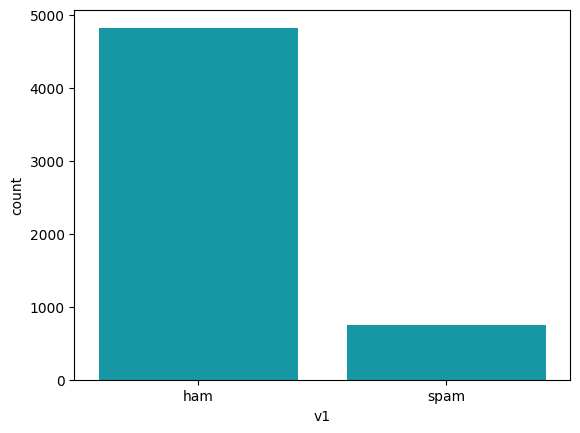

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the desired color
bar_color = "#00aabb"

# Plot a count plot for each class with the specified color
sns.countplot(x='v1', data=df, color=bar_color)

# Display the plot
plt.show()


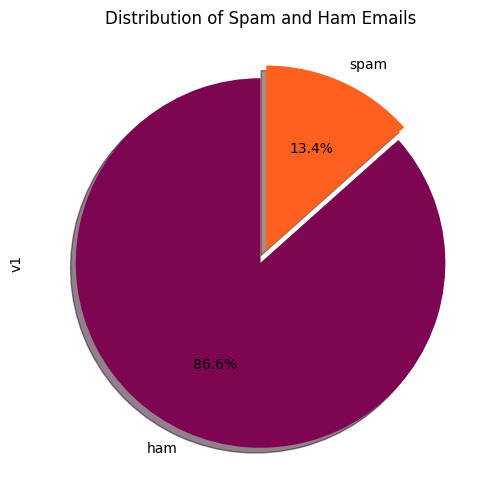

In [ ]:
# pie chart for distribution of spam and ham emails
import matplotlib.pyplot as plt

df['v1'].value_counts().plot(kind='pie',
                            figsize=(8, 6),
                            autopct="%1.1f%%",
                            startangle=90,
                            shadow=True,
                            labels=['ham', 'spam'],
                            colors=['#7D0552', '#FF5F1F'],
                            explode=[0, 0.075])

# Add a title to the pie chart
plt.title("Distribution of Spam and Ham Emails")

# Display the pie chart
plt.show()


Label Encoding

Label Encoding is a technique that is used to convert categorical columns into
numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [ ]:
# replace the null values with a null string
mail_dataframe = df.where((pd.notnull(df)),'')

In [ ]:
# printing the first 5 rows of the dataframe
mail_dataframe.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label Encoding

In [ ]:
# label spam mail as 0;  ham mail as 1;

mail_dataframe.loc[mail_dataframe['v1'] == 'spam', 'v1',] = 0
mail_dataframe.loc[mail_dataframe['v1'] == 'ham', 'v1',] = 1

In [ ]:
# separating the data as texts and label

X = mail_dataframe['v2']

Y = mail_dataframe['v1']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


# Splitting the data into training data & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Convert the training data to feature vectors
X_train_features = feature_extraction.fit_transform(X_train)

# Convert the test data to feature vectors
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [ ]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

# Training the Model

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()

In [ ]:
model = LogisticRegression()

In [ ]:
model = LogisticRegression()

# **Evaluating the trained model**

In [ ]:
# Train the logistic regression model
model.fit(X_train_features, Y_train)

# Predict target values on the training data
prediction_on_training_data = model.predict(X_train_features)

# Calculate accuracy on the training data
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Print the accuracy on the training data
print('Accuracy on training data:', accuracy_on_training_data)


Accuracy on training data: 0.9661207089970832


In [ ]:
# Predict target values on the test data
prediction_on_test_data = model.predict(X_test_features)

# Calculate accuracy on the test data
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print the accuracy on the test data
print('Accuracy on test data:', accuracy_on_test_data)


Accuracy on test data: 0.9623318385650225


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the Random Forest Classifier
model = RandomForestClassifier()

# Train the Random Forest Classifier
model.fit(X_train_features, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test_features)

# Calculate accuracy on the test data
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print('Accuracy on test data:', accuracy)


Accuracy on test data: 0.9802690582959641


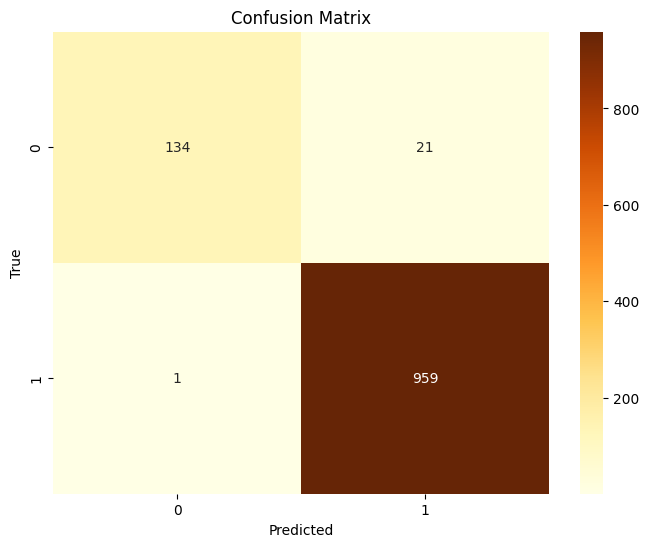

In [ ]:
# Import the required libraries
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display confusion matrix as a heatmap with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Building a Predictive System**

In [ ]:
input_mail = ["Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML	PO Box 5249	 MK17 92H. 450Ppw 1	"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


# conclusion


 conclusion, this project focused on the classification of emails as "ham" (non-spam) or "spam" using machine learning techniques. Two models, logistic regression and random forest classifier, were employed for this task. Here's a summary of the findings:
Model Training and Evaluation:

"In this project, we developed an email spam detection system using both Logistic Regression and Random Forest Classifier. We started by acquiring a labeled dataset of emails, where each email was labeled as either spam or ham (non-spam). We performed data preprocessing to clean and transform the text data into numerical feature vectors using TF-IDF vectorization.

We applied Logistic Regression and Random Forest Classifier, two popular machine learning algorithms, to train models on the transformed feature vectors of the emails using the training dataset.

Overall, the combination of Logistic Regression and Random Forest Classifier in our email spam detection system proved to be effective. The system can reliably identify and filter out spam emails, improving email security and user experience.


